In [1]:
import pandas as pd
import pathlib as plb
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure as fg
from scipy import stats
import dabest

/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_loc = plb.Path('/Users/emilyfryer/Documents/Current_analysis/automated_results/Fall_results')

In [3]:
plate_dat = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/ImageData_Fall20.csv')

In [16]:
plate_dat.rename(columns={
                       "Image file name:": 'filename',
                       'Is this the pre or post assay image?': 'pre_fin',
                      'Plate number in slot 1:': '1',
                       'Plate number in slot 2:': '2',
                       'Plate number in slot 3:': '3',
                       'Plate number in slot 4:': '4',}, inplace=True)

In [17]:
plate_dat.head()

,Timestamp,Scanner Number:,filename,1,2,3,4
0,10/29/2020 16:52:03,3,NPP_201102_01_pre.tif,NPP_201102_001,NPP_201102_002,NPP_201102_003,NPP_201102_004
1,10/29/2020 16:59:16,4,NPP_201030_01_pre.tif,NPP_201030_001,NPP_201030_002,NPP_201030_003,NPP_201030_004
2,10/29/2020 17:00:22,3,NPP_201102_01_pre.tiff,NPP_201102_005,NPP_201102_006,NPP_201102_007,NPP_201102_008
3,10/29/2020 17:01:35,3,NPP_201102_03_pre.tiff,NPP_201102_009,NPP_201102_010,NaN,NaN
4,10/29/2020 17:06:43,4,NPP_201030_02_pre.tif,NPP_201030_005,NPP_201030_006,NPP_201030_007,NPP_201030_008


In [21]:
plate_prefix = ['NPP_201030', 'NPP_201102', 'NPP_201106']
well_list = ['A', 'B', 'C','D']

In [22]:
new_list = []
for prefix in plate_prefix:
    for well in well_list:
        for i in range(1,21):
            if i <10:
                new_prefix = prefix + '_' + str('00') + str(i) + well
            if i >= 10:
                new_prefix = prefix +  '_' + str('0') + str(i) + well
            new_list.append(new_prefix)

In [23]:
new_list

['NPP_201030_001A',
 'NPP_201030_002A',
 'NPP_201030_003A',
 'NPP_201030_004A',
 'NPP_201030_005A',
 'NPP_201030_006A',
 'NPP_201030_007A',
 'NPP_201030_008A',
 'NPP_201030_009A',
 'NPP_201030_010A',
 'NPP_201030_011A',
 'NPP_201030_012A',
 'NPP_201030_013A',
 'NPP_201030_014A',
 'NPP_201030_015A',
 'NPP_201030_016A',
 'NPP_201030_017A',
 'NPP_201030_018A',
 'NPP_201030_019A',
 'NPP_201030_020A',
 'NPP_201030_001B',
 'NPP_201030_002B',
 'NPP_201030_003B',
 'NPP_201030_004B',
 'NPP_201030_005B',
 'NPP_201030_006B',
 'NPP_201030_007B',
 'NPP_201030_008B',
 'NPP_201030_009B',
 'NPP_201030_010B',
 'NPP_201030_011B',
 'NPP_201030_012B',
 'NPP_201030_013B',
 'NPP_201030_014B',
 'NPP_201030_015B',
 'NPP_201030_016B',
 'NPP_201030_017B',
 'NPP_201030_018B',
 'NPP_201030_019B',
 'NPP_201030_020B',
 'NPP_201030_001C',
 'NPP_201030_002C',
 'NPP_201030_003C',
 'NPP_201030_004C',
 'NPP_201030_005C',
 'NPP_201030_006C',
 'NPP_201030_007C',
 'NPP_201030_008C',
 'NPP_201030_009C',
 'NPP_201030_010C',


In [24]:
df = pd.DataFrame({'Plate_well_id':new_list})
df.head()

,Plate_well_id
0,NPP_201030_001A
1,NPP_201030_002A
2,NPP_201030_003A
3,NPP_201030_004A
4,NPP_201030_005A


In [50]:
#df.to_csv('/Users/emilyfryer/Documents/Current_analysis/Well_ids.csv', index=False)

In [25]:
blind = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/Well_ids.csv')
blind['Compound'] = ''

In [26]:
compounds = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/compound_ids.csv')
compounds.head()

,Compound,ID,Solvent,Notes,Published CI,Unnamed: 5,Unnamed: 6
0,Isobutanol/2-Methyl-1-propanol,1,H2O,NaN,+,NaN,NaN
1,Thujole (alpha beta mix),2,H2O,NaN,NaN,NaN,NaN
2,Spermadine,3,H2O,NaN,NaN,NaN,NaN
3,Cadaverine,4,EtOH,NaN,NaN,NaN,NaN
4,2-Undecanone,5,DMSO,NaN,-,Analog,2-nonanone


In [27]:
def add_compound(row, compound_metadata):
    compound = compound_metadata.loc[
        compound_metadata['ID']==row['Compound_ID']]['Compound']
    return compound.values[0]

In [28]:
blind['Compound'] = blind.apply(
    lambda row: add_compound(row, compounds), axis=1)
blind.head()

,Plate_well_id,Unnamed: 1,Compound_ID,Compound
0,NPP_201030_001A,NaN,1,Isobutanol/2-Methyl-1-propanol
1,NPP_201030_002A,NaN,13,2-butanone
2,NPP_201030_003A,NaN,25,SINOMENINE
3,NPP_201030_004A,NaN,37,alpha-terpineol
4,NPP_201030_005A,NaN,8,Octyl acetate


In [29]:
def add_solvent(row, compound_metadata):
    compound = compound_metadata.loc[
        compound_metadata['ID']==row['Compound_ID']]['Solvent']
    return compound.values[0]

In [30]:
blind['Solvent'] = blind.apply(
    lambda row: add_solvent(row, compounds), axis=1)
blind.head()

,Plate_well_id,Unnamed: 1,Compound_ID,Compound,Solvent
0,NPP_201030_001A,NaN,1,Isobutanol/2-Methyl-1-propanol,H2O
1,NPP_201030_002A,NaN,13,2-butanone,EtOH
2,NPP_201030_003A,NaN,25,SINOMENINE,H2O
3,NPP_201030_004A,NaN,37,alpha-terpineol,DMSO
4,NPP_201030_005A,NaN,8,Octyl acetate,EtOH


In [29]:
blind = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/unblind.csv')

In [10]:
new_df = pd.DataFrame()
for data in data_loc.glob('*.csv'):
    image_id = data.stem + '_fin.tif'
    hold = pd.read_csv(data)
    #hold['Image ID']=image_id
    hold['Slot'] = hold['WellNo'].astype(str).str[0]
    hold['Well'] = hold['WellNo'].astype(str).str[1]
    new_df= pd.concat([new_df,hold])

In [11]:
new_df.reset_index(drop=True, inplace=True)
#new_df.to_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/image_dat.csv')
#new_df = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/image_dat.csv')
new_df.head()

,Unnamed: 0,WellNo,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,area,Total Worms,Chemotaxis,Compound,Strain,File Name,Slot,Well
0,0,1A,1440,7303,990,5791,1891,8840,2353041,214.0,0.040000,NaN,NaN,NPP_201106_04_fin033,1,A
1,1,1B,2944,7322,2468,5809,3419,8846,2373100,184.0,-0.191781,NaN,NaN,NPP_201106_04_fin033,1,B
2,2,1C,4398,7314,3952,5789,4849,8848,2357690,186.0,0.175000,NaN,NaN,NPP_201106_04_fin033,1,C
3,3,1D,5807,7299,5356,5787,6254,8819,2344906,207.0,0.236364,NaN,NaN,NPP_201106_04_fin033,1,D
4,4,2A,1443,2869,983,1329,1898,4398,2381013,214.0,0.190476,NaN,NaN,NPP_201106_04_fin033,2,A


In [12]:
a

,Unnamed: 0,WellNo,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,area,Total Worms,Chemotaxis,Compound,Strain,File Name,Slot,Well
0,0,1A,1440,7303,990,5791,1891,8840,2353041,214.0,0.040000,NaN,NaN,NPP_201106_04_fin.tif,1,A
1,1,1B,2944,7322,2468,5809,3419,8846,2373100,184.0,-0.191781,NaN,NaN,NPP_201106_04_fin.tif,1,B
2,2,1C,4398,7314,3952,5789,4849,8848,2357690,186.0,0.175000,NaN,NaN,NPP_201106_04_fin.tif,1,C
3,3,1D,5807,7299,5356,5787,6254,8819,2344906,207.0,0.236364,NaN,NaN,NPP_201106_04_fin.tif,1,D
4,4,2A,1443,2869,983,1329,1898,4398,2381013,214.0,0.190476,NaN,NaN,NPP_201106_04_fin.tif,2,A


In [18]:
for index, row in new_df.iterrows():
    slot = row['Slot']
    f_id = row['File Name']
    pid = plate_dat.loc[f_id==plate_dat['filename']][slot]
    pid2= pid.reset_index(drop=True).to_frame()


In [21]:
def add_pid(row, image_metdat):
    slot = row['Slot']
    pid = image_metdat.loc[row['File Name']==image_metdat['filename']][slot]
    wid = pid.values[0] + row['Well']
    return wid
    

In [22]:
new_df['pid']=new_df.apply(
    lambda row: add_pid(row, plate_dat), axis=1)


In [23]:
new_df.tail()

,Unnamed: 0,WellNo,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,area,Total Worms,Chemotaxis,Compound,Strain,File Name,Slot,Well,pid
223,11,3D,12542,2847,12105,1318,12987,4377,2352480,157.0,0.180556,NaN,NaN,NPP_201102_02_fin.tif,3,D,NPP_201102_007D
224,12,4A,8119,7288,7680,5772,8563,8823,2292108,180.0,-0.094118,NaN,NaN,NPP_201102_02_fin.tif,4,A,NPP_201102_008A
225,13,4B,9598,7299,9147,5777,10042,8830,2300046,193.0,0.000000,NaN,NaN,NPP_201102_02_fin.tif,4,B,NPP_201102_008B
226,14,4C,11042,7318,10592,5818,11492,8848,2318150,205.0,-0.145833,NaN,NaN,NPP_201102_02_fin.tif,4,C,NPP_201102_008C
227,15,4D,12529,7338,12082,5842,12982,8865,2308067,103.0,0.186813,NaN,NaN,NPP_201102_02_fin.tif,4,D,NPP_201102_008D


In [24]:
#new_df.to_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/thissucks.csv')

In [25]:
def metdat2realdat(row, compound_metadata):
    cmpnd = compound_metadata.loc[compound_metadata['Plate_well_id']==row['pid']]['Compound']
    return cmpnd.values[0]

In [30]:
new_df['Compound']=new_df.apply(
    lambda row: metdat2realdat(row, blind), axis=1)


In [33]:
def add_neighbors(df):
    if df['Well']== 'A' or df['Well'] == 'D':
        neighbor = 1
    else:
        neighbor = 2
    return neighbor

In [42]:
new_df['pid'] = new_df['pid'].str[:-1]
new_df.head()

,Unnamed: 0,WellNo,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,area,Total Worms,Chemotaxis,Compound,Strain,File Name,Slot,Well,pid,Neighbor
0,0,1A,1440,7303,990,5791,1891,8840,2353041,214.0,0.040000,DMSO,NaN,NPP_201106_04_fin.tif,1,A,NPP_201106_011,1
1,1,1B,2944,7322,2468,5809,3419,8846,2373100,184.0,-0.191781,(S)-(+)-Carvone,NaN,NPP_201106_04_fin.tif,1,B,NPP_201106_011,2
2,2,1C,4398,7314,3952,5789,4849,8848,2357690,186.0,0.175000,Frankinscence,NaN,NPP_201106_04_fin.tif,1,C,NPP_201106_011,2
3,3,1D,5807,7299,5356,5787,6254,8819,2344906,207.0,0.236364,Agmatine,NaN,NPP_201106_04_fin.tif,1,D,NPP_201106_011,1
4,4,2A,1443,2869,983,1329,1898,4398,2381013,214.0,0.190476,Limonin,NaN,NPP_201106_04_fin.tif,2,A,NPP_201106_012,1


In [237]:
new_df.head()

,WellNo,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,area,Total Worms,Chemotaxis,Compound,Strain,Image ID,Slot,Well,pid,Solvent,Neighbor
0,1A,1449,7631,1000,6115,1895,9163,2339634,162.0,-0.013889,Cadaverine,NaN,NPP_201106_01_fin.tif,1,A,NPP_201106_001,EtOH,1
1,1B,2946,7632,2503,6113,3397,9154,2320422,152.0,-0.114504,Octyl acetate,NaN,NPP_201106_01_fin.tif,1,B,NPP_201106_001,EtOH,2
2,1C,4399,7636,3952,6110,4853,9170,2354900,143.0,-0.383333,(S)-(+)-Carvone,NaN,NPP_201106_01_fin.tif,1,C,NPP_201106_001,EtOH,2
3,1D,5823,7626,5377,6106,6277,9161,2346795,177.0,-0.047619,Lemongrass,NaN,NPP_201106_01_fin.tif,1,D,NPP_201106_001,DMSO,1
4,2A,1432,2598,985,1058,1882,4149,2392425,141.0,0.450000,Isoamyl alcohol*,NaN,NPP_201106_01_fin.tif,2,A,NPP_201106_002,EtOH,1


In [240]:
new_df['Neighbor'] = new_df['Neighbor'].astype(str)

/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/seaborn/utils.py:238: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.yaxis.majorTicks)
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/seaborn/utils.py:239: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.yaxis.minorTicks)
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/seaborn/utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/seaborn/utils.py:244: MatplotlibDeprecationWarning: 

/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/dabest/_classes.py:578: UserWarning: The lower limit of the BCa interval cannot be computed. It is set to the effect size itself. All bootstrap values were likely all the same.
  stacklevel=0)
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/dabest/_classes.py:583: UserWarning: The upper limit of the BCa interval cannot be computed. It is set to the effect size itself. All bootstrap values were likely all the same.
  stacklevel=0)
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/seaborn/utils.py:238: MatplotlibDep

/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/seaborn/utils.py:238: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.yaxis.majorTicks)
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/seaborn/utils.py:239: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.yaxis.minorTicks)
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/seaborn/utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/seaborn/utils.py:244: MatplotlibDeprecationWarning: 

IndexError: "1" is not a group in the column `Neighbor`. Please check `idx` and try again.

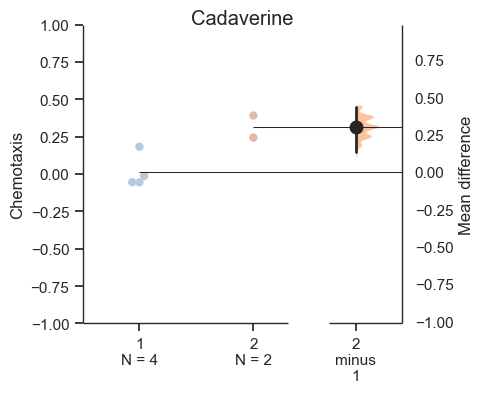

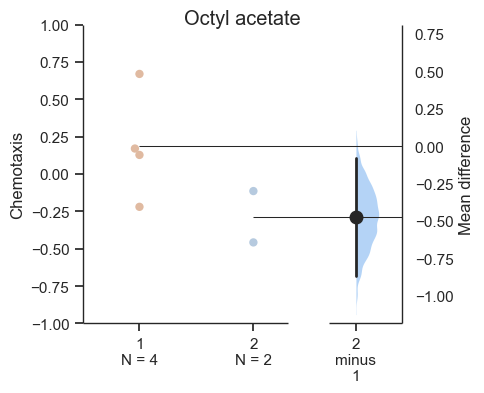

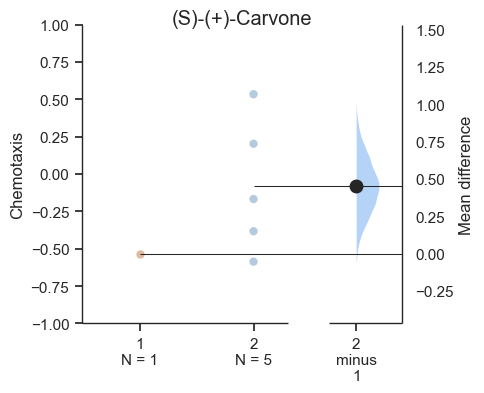

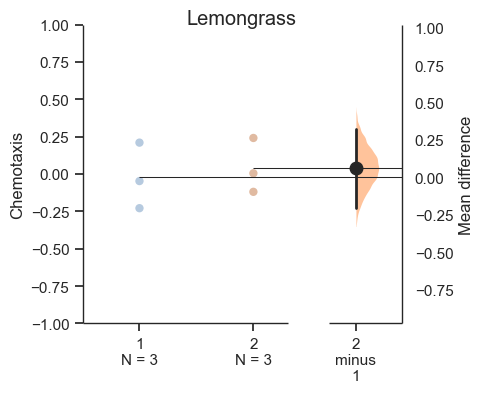

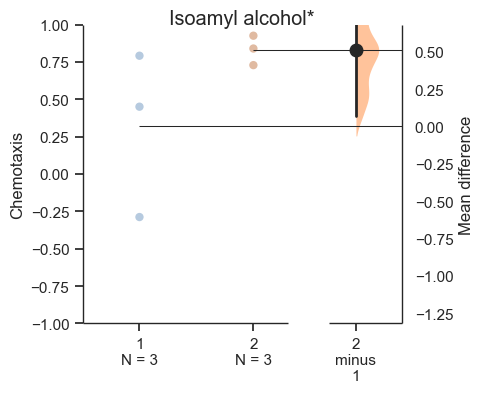

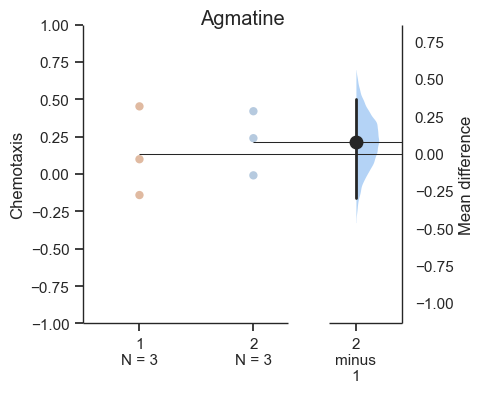

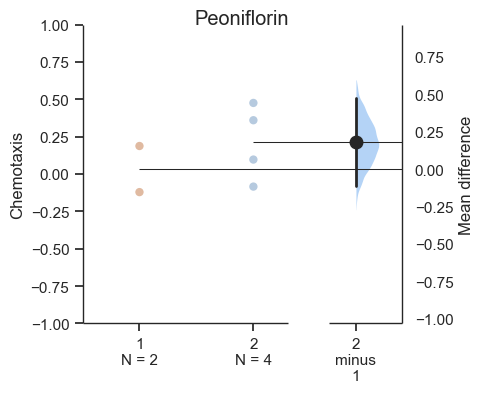

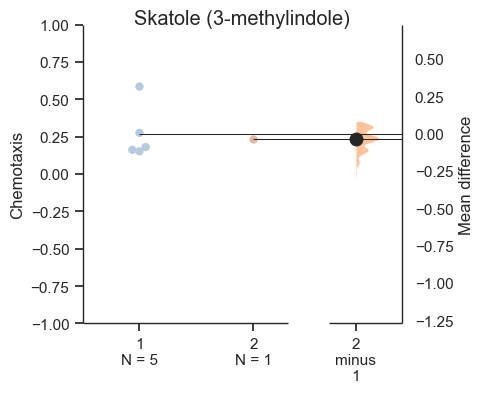

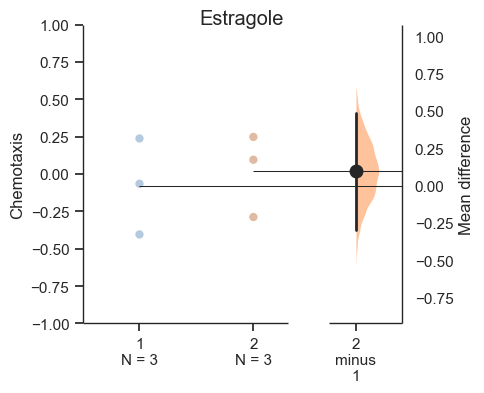

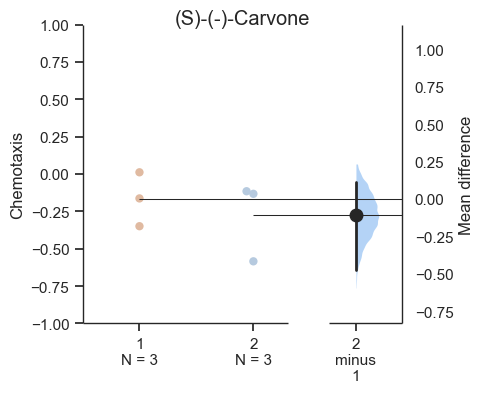

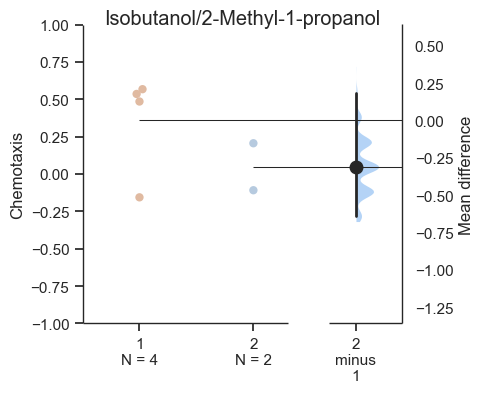

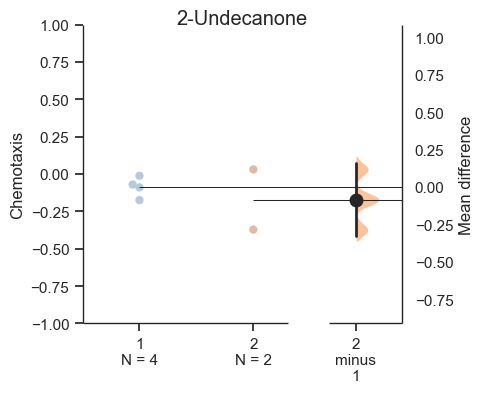

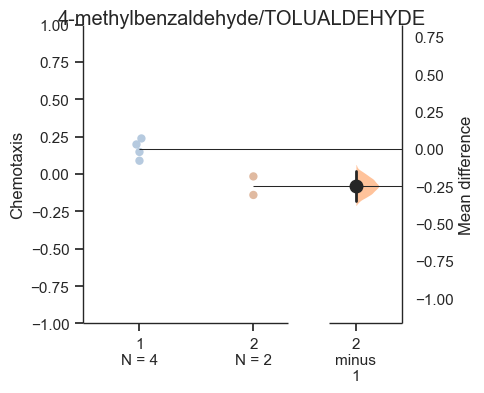

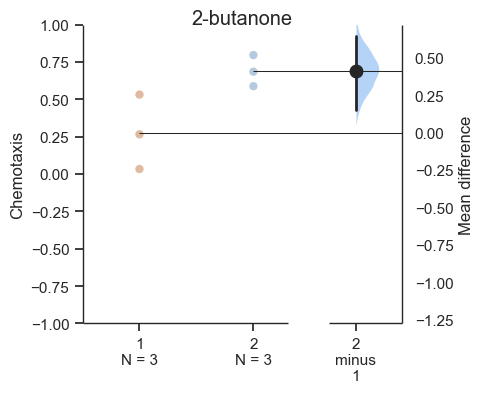

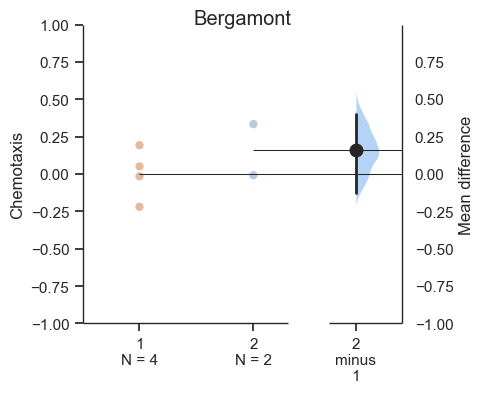

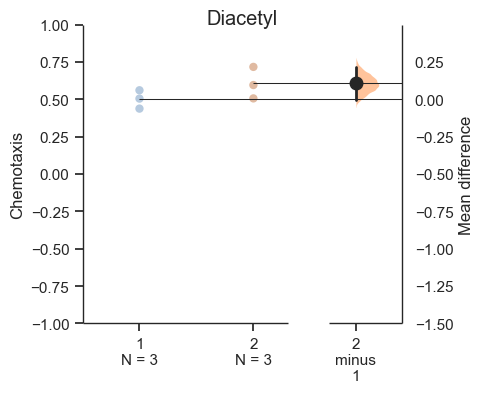

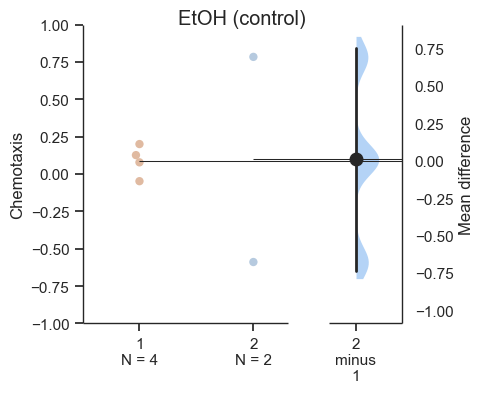

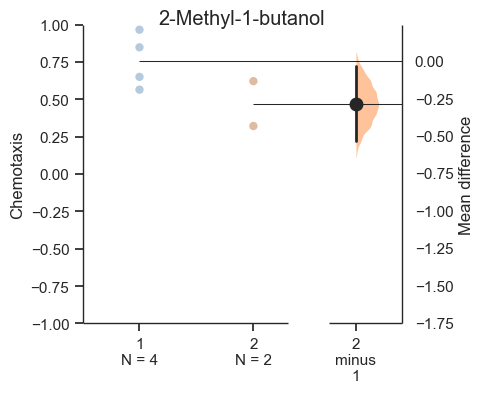

In [270]:
for compound in new_df['Compound'].unique():
    this_compound_data = dabest.load(
        data=new_df.loc[new_df['Compound']==compound],
        x='Neighbor', y='Chemotaxis', idx=new_df['Neighbor'].unique())
    this_fig = this_compound_data.mean_diff.plot(swarm_ylim=(-1, 1),
                              contrast_ylim=(-1, 1))
    this_fig.suptitle(compound)


In [31]:
def solvdat2realdat(row, compound_metadata):
    solvent = compound_metadata.loc[compound_metadata['Plate_well_id']==row['pid']]['Solvent']
    return solvent.values[0]

In [32]:
new_df['Solvent']=new_df.apply(
    lambda row: solvdat2realdat(row, blind), axis=1)

KeyError: 'Solvent'

In [95]:
#new_df.to_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/Fall20_results.csv')
new_df = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/Fall20_results.csv')

In [96]:
new_df['Neighbor'] = new_df.apply(add_neighbors, axis = 1)

In [97]:
new_df = new_df.drop(new_df.columns[0:3], axis=1).reset_index(drop=True)


In [98]:
new_df.head()

,WellNo,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,area,Total Worms,Chemotaxis,Compound,Strain,Image ID,Slot,Well,pid,Solvent,Neighbor
0,1A,1449,7631,1000,6115,1895,9163,2339634,162.0,-0.013889,Cadaverine,NaN,NPP_201106_01_fin.tif,1,A,NPP_201106_001A,EtOH,1
1,1B,2946,7632,2503,6113,3397,9154,2320422,152.0,-0.114504,Octyl acetate,NaN,NPP_201106_01_fin.tif,1,B,NPP_201106_001B,EtOH,2
2,1C,4399,7636,3952,6110,4853,9170,2354900,143.0,-0.383333,(S)-(+)-Carvone,NaN,NPP_201106_01_fin.tif,1,C,NPP_201106_001C,EtOH,2
3,1D,5823,7626,5377,6106,6277,9161,2346795,177.0,-0.047619,Lemongrass,NaN,NPP_201106_01_fin.tif,1,D,NPP_201106_001D,DMSO,1
4,2A,1432,2598,985,1058,1882,4149,2392425,141.0,0.450000,Isoamyl alcohol*,NaN,NPP_201106_01_fin.tif,2,A,NPP_201106_002A,EtOH,1


In [99]:
new_df.reindex(new_df.Compound.sort_values(ascending=True).index)

,WellNo,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,area,Total Worms,Chemotaxis,Compound,Strain,Image ID,Slot,Well,pid,Solvent,Neighbor
78,4C,11183,7298,10740,5784,11636,8822,2318540,206.0,-0.586957,(S)-(+)-Carvone,NaN,NPP_201030_02_fin.tif,4,C,NPP_201030_008C,EtOH,2
189,2B,2874,2597,2416,1055,3332,4122,2324471,227.0,0.202073,(S)-(+)-Carvone,NaN,NPP_201102_04_fin.tif,2,B,NPP_201102_012B,EtOH,2
2,1C,4399,7636,3952,6110,4853,9170,2354900,143.0,-0.383333,(S)-(+)-Carvone,NaN,NPP_201106_01_fin.tif,1,C,NPP_201106_001C,EtOH,2
211,3D,12780,2495,12333,963,13226,4016,2366306,153.0,-0.532847,(S)-(+)-Carvone,NaN,NPP_201102_01_fin.tif,3,D,NPP_201102_003D,EtOH,1
113,1B,2944,7322,2467,5809,3423,8847,2382437,150.0,-0.168000,(S)-(+)-Carvone,NaN,NPP_201106_04_fin.tif,1,B,NPP_201106_011B,EtOH,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1C,4322,7325,3866,5801,4778,8832,2369825,117.0,-0.714286,trans-anethole,NaN,NPP_201102_03_fin.tif,1,C,NPP_201102_009C,DMSO,2
85,2B,2909,2614,2460,1074,3367,4142,2380671,149.0,-0.405797,trans-anethole,NaN,NPP_201030_06_fin.tif,2,B,NPP_201030_020B,DMSO,2
95,2D,5727,2825,5260,1278,6173,4353,2330610,150.0,-0.430894,trans-anethole,NaN,NPP_201106_06_fin.tif,2,D,NPP_201106_020D,DMSO,1
171,1D,5761,7359,5307,5862,6218,8846,2306297,225.0,-0.372340,trans-anethole,NaN,NPP_201102_05_fin.tif,1,D,NPP_201102_015D,DMSO,1


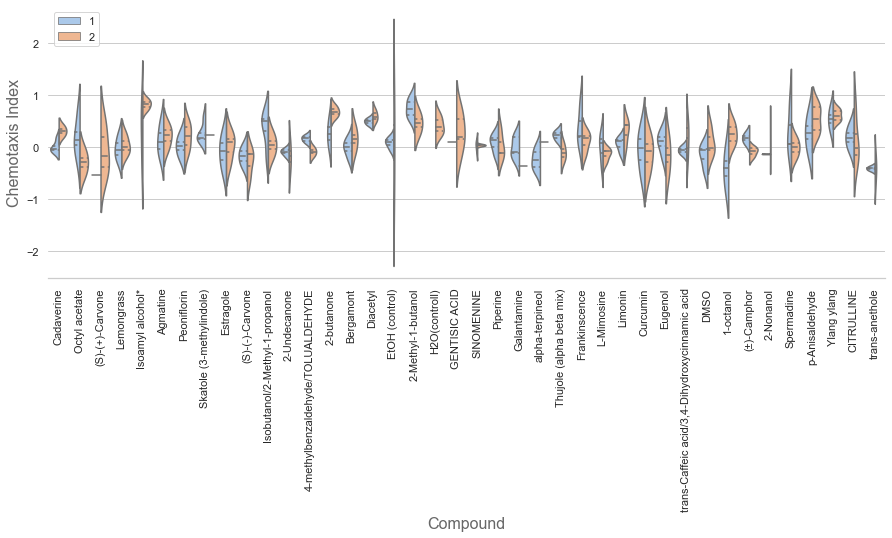

In [144]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

f, ax = plt.subplots(figsize=(15, 5))

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Compound", y="Chemotaxis", hue="Neighbor", data=new_df, split=True, linewidth=1.5,
               inner="quart")
sns.despine(left=True)

#f.suptitle('Chick weights by feed type', fontsize=18, fontweight='bold')
plt.xticks(rotation=90)
ax.set_xlabel("Compound",size = 16,alpha=0.7)
ax.set_ylabel("Chemotaxis Index",size = 16,alpha=0.7)
plt.legend(loc='upper left')

In [100]:
cmpd_mn = new_df.groupby(['Compound', 'Neighbor'])['Chemotaxis'].mean().to_frame().reset_index()

In [107]:
neighb_count = new_df.groupby(['Compound', 'Neighbor'])['Neighbor'].count().to_frame(name='Neighbor_count').reset_index()

In [218]:
plate_groups.get_group('NPP_201106_001')

,WellNo,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,area,Total Worms,Chemotaxis,Compound,Strain,Image ID,Slot,Well,pid,Solvent,Neighbor
0,1A,1449,7631,1000,6115,1895,9163,2339634,162.0,-0.013889,Cadaverine,NaN,NPP_201106_01_fin.tif,1,A,NPP_201106_001,EtOH,1
1,1B,2946,7632,2503,6113,3397,9154,2320422,152.0,-0.114504,Octyl acetate,NaN,NPP_201106_01_fin.tif,1,B,NPP_201106_001,EtOH,2
2,1C,4399,7636,3952,6110,4853,9170,2354900,143.0,-0.383333,(S)-(+)-Carvone,NaN,NPP_201106_01_fin.tif,1,C,NPP_201106_001,EtOH,2
3,1D,5823,7626,5377,6106,6277,9161,2346795,177.0,-0.047619,Lemongrass,NaN,NPP_201106_01_fin.tif,1,D,NPP_201106_001,DMSO,1


In [201]:
new_df['pid'] = new_df['pid'].str[:-1]

In [212]:
test_groups = []
plate_groups = new_df.groupby(['pid'])

In [232]:
plate_groups.get_group(["Diacetyl"])

TypeError: unhashable type: 'list'

In [125]:
cmpd_mn['Neighbor_count']=neighb_count['Neighbor_count']

In [131]:
cmpd_mn['CI_variance'] = cmpd_var['CI_variance']

In [135]:
cmpd_mn.to_csv('/Users/emilyfryer/Documents/Current_analysis/fall20_sumdat.csv')

In [245]:
new_df.to_csv('/Users/emilyfryer/Documents/Current_analysis/201221.csv')

In [256]:
pnums = []
for index, row in new_df.iterrows():
    if row['Compound']== 'Diacetyl' or row['Compound']== 'Isoamyl alcohol*' or row['Compound'] == '2-Methyl-1-butanol':
        pnum = row['pid']
        pnums.append(pnum)

In [257]:
pnums

['NPP_201106_002',
 'NPP_201106_004',
 'NPP_201030_001',
 'NPP_201030_009',
 'NPP_201106_006',
 'NPP_201030_006',
 'NPP_201030_018',
 'NPP_201106_015',
 'NPP_201106_016',
 'NPP_201106_018',
 'NPP_201030_012',
 'NPP_201030_013',
 'NPP_201102_020',
 'NPP_201102_020',
 'NPP_201102_011',
 'NPP_201102_003',
 'NPP_201102_005',
 'NPP_201102_006']

In [149]:
pt = pd.pivot_table(cmpd_mn, values = 'Chemotaxis', index=['Compound'], columns = 'Neighbor').reset_index()
pt.head()

Neighbor,Compound,1,2
0,(S)-(+)-Carvone,-0.532847,-0.080495
1,(S)-(-)-Carvone,-0.167373,-0.277737
2,(±)-Camphor,0.174839,-0.082539
3,1-octanol,-0.402900,0.267787
4,2-Methyl-1-butanol,0.756603,0.470904


In [153]:
pt.columns = ['Compound', '1_neighbor', '2_neighbors']

In [192]:
cmpd_mn.head()

,Compound,Neighbor,Chemotaxis,Neighbor_count,CI_variance
0,(S)-(+)-Carvone,1,-0.532847,1,NaN
1,(S)-(+)-Carvone,2,-0.080495,5,0.203251
2,(S)-(-)-Carvone,1,-0.167373,3,0.032537
3,(S)-(-)-Carvone,2,-0.277737,3,0.070706
4,(±)-Camphor,1,0.174839,2,0.010868


LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)


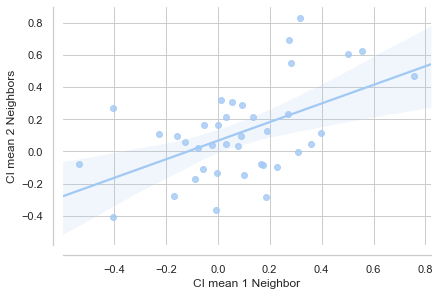

In [225]:
fig, ax = plt.subplots(constrained_layout=True)
sns.regplot(x='1_neighbor', y='2_neighbors', ax=ax,
                     data=pt)
ax.set_ylabel('CI mean 2 Neighbors')
ax.set_xlabel('CI mean 1 Neighbor')
sns.despine(offset=10)
fig.savefig('/Users/emilyfryer/Documents/Current_analysis/MeanCIs_reg.png')

fit_results = stats.linregress(
    pt['1_neighbor'], pt['2_neighbors'])
print(fit_results)

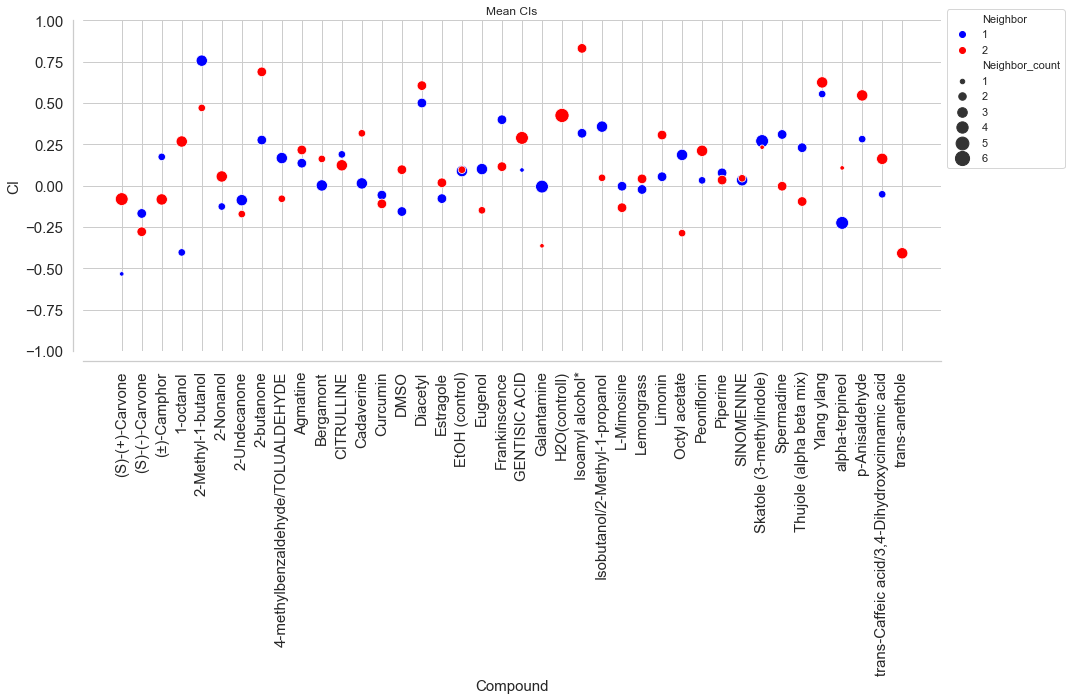

In [273]:
c=['blue', 'red']
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=cmpd_mn, x= 'Compound', y='Chemotaxis', hue='Neighbor', 
                size='Neighbor_count', sizes=(20, 200),palette=['blue','red'], legend='full')

ax.set_xlabel('Compound', fontsize=15)
ax.set_ylabel('CI', fontsize=15)
ax.set_title('Mean CIs')
ax.legend(bbox_to_anchor=(1.15, 1.05))
ax.set_ylim((-1, 1))
ax.tick_params(labelsize=15)
sns.despine(offset=10)
plt.xticks(rotation=90)
fig.tight_layout()
fig.savefig('/Users/emilyfryer/Documents/Current_analysis/MeanCIs_sctr.png')


In [187]:
cmpd_mn.head()

,Compound,Neighbor,Chemotaxis,Neighbor_count,CI_variance
0,(S)-(+)-Carvone,1,-0.532847,1,NaN
1,(S)-(+)-Carvone,2,-0.080495,5,0.203251
2,(S)-(-)-Carvone,1,-0.167373,3,0.032537
3,(S)-(-)-Carvone,2,-0.277737,3,0.070706
4,(±)-Camphor,1,0.174839,2,0.010868


In [129]:
cmpd_var = new_df.groupby(['Compound', 'Neighbor'])['Chemotaxis'].var().to_frame(name='CI_variance').reset_index()

In [57]:
#test = new_df.groupby('Compound')['Chemotaxis'].mean().reset_index()
#test.to_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/alldat.csv')

In [94]:
published = ['DMSO','EtOH (control)','H2O(controll)','Diacetyl','Isoamyl alcohol*','2-Methyl-1-butanol', 
'Isobutanol/2-Methyl-1-propanol','2-butanone','2-Nonanol','2-Undecanone','1-octanol','(S)-(-)-Carvone','(S)-(+)-Carvone','(±)-Camphor','p-Anisaldehyde',
'Eugenol', 'Piperine','Curcumin','Galantamine','Estragole','alpha-terpineol','Thujole (alpha beta mix)', 'trans-anethole','GENTISIC ACID',
'CITRULLINE','SINOMENINE','L-Mimosine','Peoniflorin','trans-Caffeic acid/3,4-Dihydroxycinnamic acid','Limonin', '4-methylbenzaldehyde/TOLUALDEHYDE','Octyl acetate','Spermadine','Cadaverine','Skatole (3-methylindole)','Agmatine','Frankinscence','Lemongrass','Ylang ylang','Bergamont']


In [12]:
Pain Grant
GENTISIC ACID
CITRULLINE
SINOMENINE
(¬±)-Camphor
L-Mimosine
Peoniflorin
trans-Caffeic acid/3,4-Dihydroxycinnamic acid
Limonin


Previous Screen:
Piperine
Curcumin
Estragole
alpha-terpineol
Thujole (alpha beta mix)
Curcumin
trans-anethole
Euganol

Essential Oils:
Frankinscence
Lemongrass
Ylang ylang
Bergamont

Bacterial Shit
Spermadine
Cadaverine
Skatole (3-methylindole)
Agmatine

Other
4-methylbenzaldehyde/TOLUALDEHYDE
Octyl acetate

SyntaxError: invalid syntax (<ipython-input-12-e5c57365ac46>, line 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

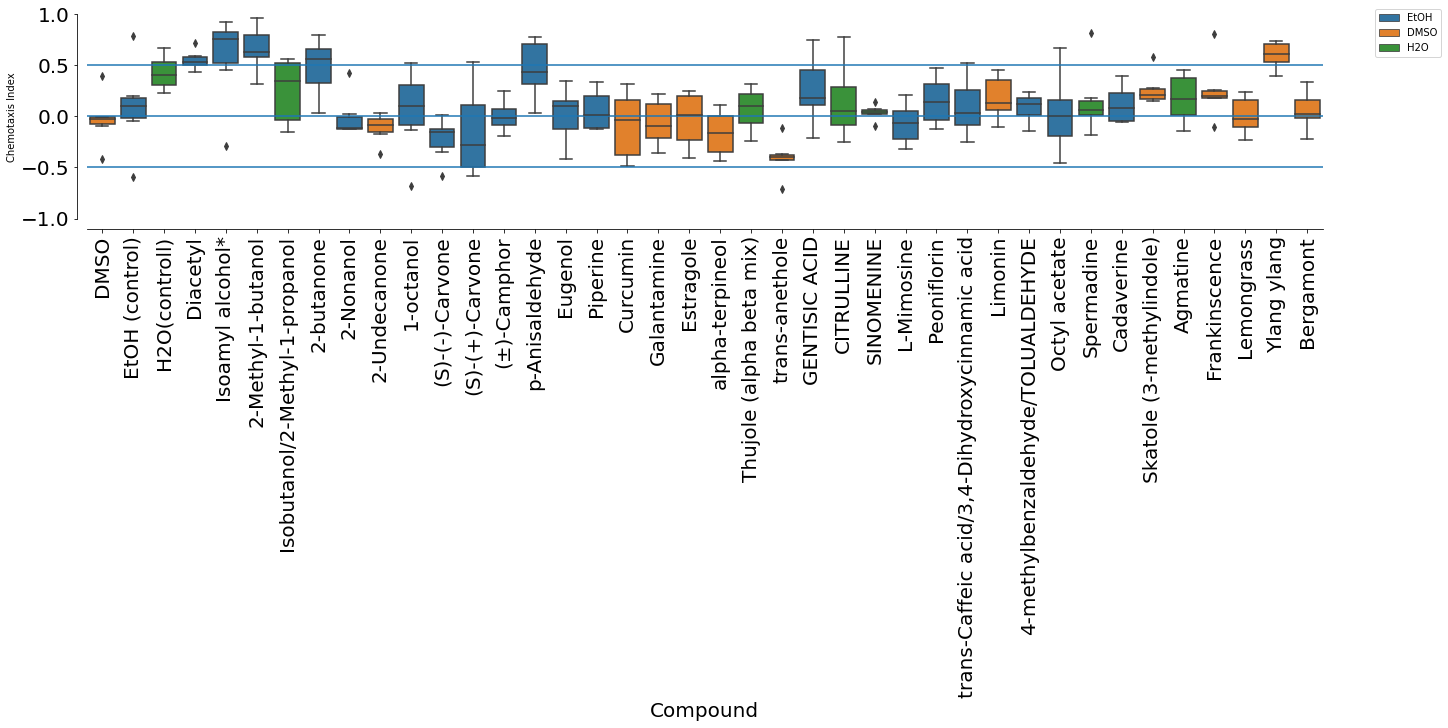

In [95]:

fig, ax = plt.subplots(figsize=(20, 10), constrained_layout=True)
sns.boxplot(x='Compound', y='Chemotaxis', ax=ax,
              data=new_df, order=published, hue='Solvent', dodge=False)
ax.set_xlabel('Compound', fontsize=20)
ax.set_ylabel('Chemotaxis Index')
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_ylim((-1, 1))
ax.tick_params(labelsize=20)
ax.axhline(.5)
ax.axhline(-.5)
ax.axhline(0)
sns.despine(offset=10)
plt.xticks(rotation=90)

In [40]:
oct30 = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/Figures/201030.csv')

In [41]:
oct30.drop(oct30.columns[0:1], axis=1).reset_index(drop=True)
oct30.head()

,Unnamed: 0,WellNo,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,area,Total Worms,Chemotaxis,Compound,Strain,Image ID,Slot,Well,pid,Solvent,Neighbor
0,16,1A,1460,7626,1012,6103,1908,9144,2331213,106,0.535354,Isobutanol/2-Methyl-1-propanol,NaN,NPP_201030_01_fin.tif,1,A,NPP_201030_001,H2O,1
1,17,1B,2942,7609,2492,6097,3404,9149,2312320,183,0.391304,Cadaverine,NaN,NPP_201030_01_fin.tif,1,B,NPP_201030_001,EtOH,2
2,18,1C,4356,7623,3887,6121,4826,9157,2314268,130,0.783333,EtOH (control),NaN,NPP_201030_01_fin.tif,1,C,NPP_201030_001,EtOH,2
3,19,1D,5813,7629,5359,6123,6259,9160,2316457,127,0.847458,2-Methyl-1-butanol,NaN,NPP_201030_01_fin.tif,1,D,NPP_201030_001,EtOH,1
4,20,2A,1454,2578,1002,1038,1912,4097,2278158,264,0.033058,2-butanone,NaN,NPP_201030_01_fin.tif,2,A,NPP_201030_002,EtOH,1


In [42]:
oct30 = oct30.groupby(['Compound'])['Chemotaxis'].var().to_frame(name='CI_variance').reset_index()
oct30.head()

,Compound,CI_variance
0,(S)-(+)-Carvone,0.627983
1,(S)-(-)-Carvone,0.010377
2,(±)-Camphor,0.098005
3,1-octanol,0.120362
4,2-Methyl-1-butanol,0.006934


In [52]:
oct30['Date'] = 1030

In [53]:
nov02 = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/Figures/201102.csv')
nov02.drop(nov02.columns[0:1], axis=1).reset_index(drop=True)
nov02 = nov02.groupby(['Compound'])['Chemotaxis'].var().to_frame(name='CI_variance').reset_index()
nov02['Date'] = 1102
nov02.head()

,Compound,CI_variance,Date
0,(S)-(+)-Carvone,0.270053,1102
1,(S)-(-)-Carvone,0.017290,1102
2,(±)-Camphor,0.000004,1102
3,1-octanol,0.016529,1102
4,2-Methyl-1-butanol,0.000408,1102


In [54]:
nov06 = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/Figures/201106.csv')
nov06.drop(nov06.columns[0:1], axis=1).reset_index(drop=True)
nov06 = nov06.groupby(['Compound'])['Chemotaxis'].var().to_frame(name='CI_variance').reset_index()
nov06['Date'] = 1106
nov06.head()

,Compound,CI_variance,Date
0,(S)-(+)-Carvone,0.023184,1106
1,(S)-(-)-Carvone,0.109966,1106
2,(±)-Camphor,0.022057,1106
3,1-octanol,0.150007,1106
4,2-Methyl-1-butanol,0.029609,1106


In [55]:
frames = [oct30, nov02, nov06]
all_vars = pd.concat(frames)


In [57]:
all_vars

,Compound,CI_variance,Date
0,(S)-(+)-Carvone,0.627983,1030
1,(S)-(-)-Carvone,0.010377,1030
2,(±)-Camphor,0.098005,1030
3,1-octanol,0.120362,1030
4,2-Methyl-1-butanol,0.006934,1030
...,...,...,...
35,Ylang ylang,0.023073,1106
36,alpha-terpineol,0.001420,1106
37,p-Anisaldehyde,0.128004,1106
38,"trans-Caffeic acid/3,4-Dihydroxycinnamic acid",0.048721,1106


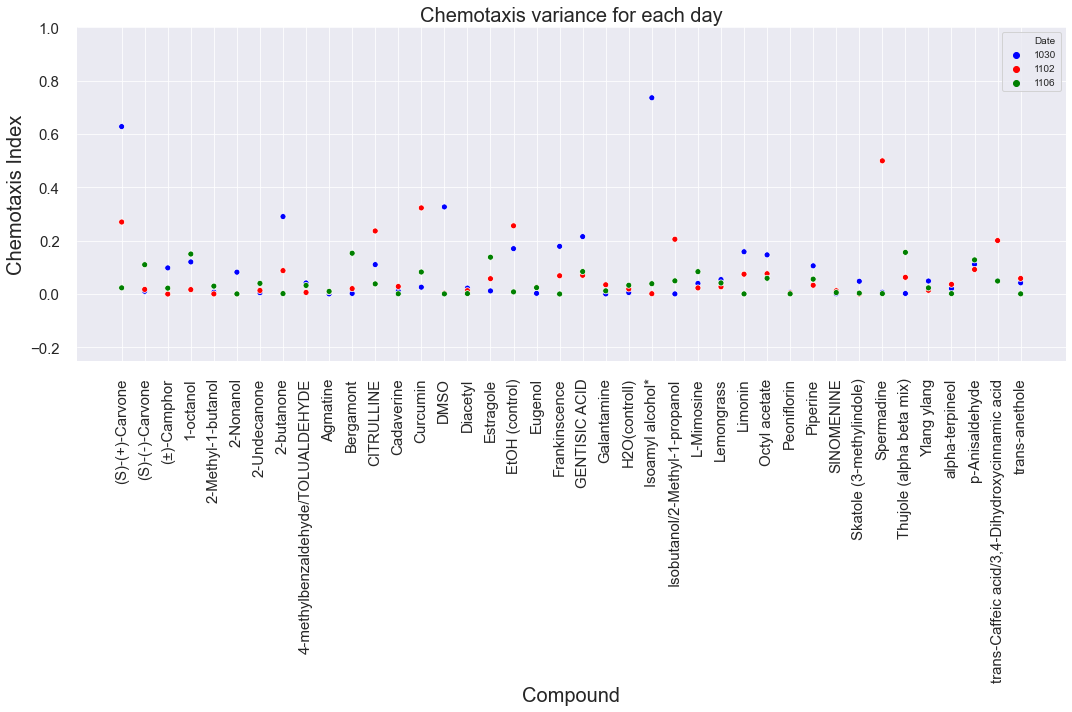

In [58]:
c=['blue', 'red', 'green']
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=all_vars, x= 'Compound', y='CI_variance', hue='Date', palette=['blue','red', 'green'])

ax.set_xlabel('Compound', fontsize=20)
ax.set_ylabel('Chemotaxis Index', fontsize=20)
ax.set_title('Chemotaxis variance for each day',fontsize=20)
#ax.legend(bbox_to_anchor=(1.15, 1.05))
ax.set_ylim((-.25, 1))
ax.tick_params(labelsize=15)
sns.despine(offset=10)
plt.xticks(rotation=90)
fig.tight_layout()
fig.savefig('/Users/emilyfryer/Documents/Current_analysis/Figures/DayVariance.png')